# Supermarket Sales

Dokumen ini berisi tentang informasi mengenai kinerja penjualan barang di suatu perusahaan supermarket. Data ini diambil dari <a href="https://www.kaggle.com/aungpyaeap/supermarket-sales">dataset di Kaggle</a>. Kemudian data tersebut dimodifikasi sedikit untuk mempermudah dalam mempelajari maupun menganalisa data, sehingga menghasilkan informasi yang diinginkan.

## A. Mengetahui atau mengenali data yang akan digunakan

### 1. Import library yang diperlukan

In [38]:
import pandas as pd
import numpy as np

### 2. Membaca file supermarket berupa excel

In [39]:
data_set = pd.read_excel('DatasetKaggle.xlsx', sheet_name='Supermarket_Modf')

### 3. Mengetahui informasi dan isi yang ada pada data tersebut

In [40]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   object        
 1   Branch         1000 non-null   object        
 2   City           1000 non-null   object        
 3   Customer type  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Product line   1000 non-null   object        
 6   Unit price     1000 non-null   float64       
 7   Quantity       1000 non-null   int64         
 8   Date           1000 non-null   object        
 9   TextDate       1000 non-null   object        
 10  ModifiedDate   1000 non-null   datetime64[ns]
 11  Payment        1000 non-null   object        
 12  Rating         1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 101.7+ KB


<b>Penjelasan</b>
<br> Data tersebut memiliki 13 kolom dan 1000 baris (untuk jumlah baris dilihat dari `RangeIndex: 1000 entries`).
<br> Secara keseluruhan, semua kolom tersebut tidak memiliki nilai null. Tipe data yang dimiliki oleh data tersebut berupa :
- `datetime64` : 1 kolom
- `float64` : 2 kolom
- `int64` : 1 kolom
- `object` : 9 kolom

<b>Cara lain untuk mengetahui jumlah kolom dan baris</b>

In [41]:
print('Data Supermarket Sales mempunyai',data_set.shape[0],'baris','dan',data_set.shape[1],'kolom')

Data Supermarket Sales mempunyai 1000 baris dan 13 kolom


In [42]:
data_set.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,TextDate,ModifiedDate,Payment,Rating
0,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,2019-01-01 00:00:00,01/01/2019,2019-01-01,Credit card,6.9
1,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,2019-01-01 00:00:00,01/01/2019,2019-01-01,Cash,5.7
2,891-01-7034,B,Mandalay,Normal,Female,Electronic accessories,74.71,6,2019-01-01 00:00:00,01/01/2019,2019-01-01,Cash,6.7
3,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,2019-01-01 00:00:00,01/01/2019,2019-01-01,Credit card,7.0
4,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,2019-01-01 00:00:00,01/01/2019,2019-01-01,Cash,8.5


<b>Penjelasan</b>
<br> Output atau hasil kode diatas menunjukkan jumlah 5 data teratas berdasarkan indeks barisnya. Berikut ini penjelasan singkat mengenai masing-masing kolom :
- `Invoice ID` : Identitas dari faktur penjualan (<i>Invoice</i>).
- `Branch` : Cabang yang dimiliki oleh perusahaan supermaket tersebut.
- `City` : Kota dimana cabang supermarket berada.
- `Customer Type` : Tipe Konsumen berdasarkan penggunaan kartu member dalam melakukan transaksi.
- `Gender` : Jenis kelamin customer.
- `Product line` : Kategori produk yang dibeli oleh customer.
- `Unit Price` : Harga per satu unit produk dalam satuan dolar.
- `Quantity` : Total barang yang dibeli customer.
- `Date` : Berisi tanggal transaksi (type data berupa objek, sekilas kolom `date` berbentuk longdate atau datetime karena terdapat waktu).
- `Text Date` : Hasil modifikasi dari kolom `Date` dalam bentuk text.
- `ModifiedDate` : Menyimpan nilai `TextDate` dan dikonversikan ke dalam tipe data date.
- `Payment` : Cara atau media pembayaran yang dilakukan oleh customer.
- `Rating` : Tingkat kepuasan customer dalam melakukan pembelian barang.

<h3>3. Menghitung Jumlah nilai atau data yang unik untuk setiap kolomnya</h3>

In [43]:
distinct_count = data_set.nunique().to_frame()
distinct_count.columns = ['Jumlah']
print("Total data atau nilai yang unik pada setiap kolomnya:", sep='\n')
distinct_count

Total data atau nilai yang unik pada setiap kolomnya:


,Jumlah
Invoice ID,1000
Branch,3
City,3
Customer type,2
Gender,2
Product line,6
Unit price,943
Quantity,10
Date,89
TextDate,89


<b>Penjelasan</b>
<br>Output diatas menampilkan perhitungan jumlah data yang unik. 
- Kolom `Invoice ID` memiliki 1000 nilai yang unik, yang artinya kolom tersebut mempresentasikan atau menjadi identitas setiap data berdasarkan barisnya.
- Kemudian Kolom `Branch` dan `City` masing-masing memiliki 3 nilai atau data yang unik. 
 <br>Bisa dikatakan data pada kolom `Branch` mewakili data pada kolom `City`, karena satu cabang hanya terdapat satu kota.
- Terdapat 6 kategori Produk atau `Product line` yang dijual oleh supermarket.
- Untuk kolom `Unit Price` dan `Quantity` masing-masing memiliki 943 nilai unik dan 10 nilai unik.
- Kolom `Date`, `TextDate` dan `ModifiedDate` memiliki jumlah data yang sama karena isi data sama, yang membedakan masing-masing tabel yaitu format penulisan dan tipe data. 
 <br>Jumlah data pada ketiga kolom tersebut adalah 89, menandakan transaksi dilakukan selama 89 hari.
- Kolom `Payment` menginformasikan bahwa terdapat 3 metode pembayaran yang dilakukan.
- Kolom `Rating` menunjukkan terdapat 61 data yang unik terkait dengan penilaian kepuasan customer.

### 4. Mengetahui nilai unik serta frekuensi(jumlah data) di setiap kolom yang betipe data objek (kecuali kolom Date dan TextDate)

<h4>4.a Nilai kolom dan jumlah data kolom Branch dan City</h4>

In [44]:
BranchCity = data_set[['Branch','City']].value_counts()
BranchCity

Branch  City     
A       Yangon       340
B       Mandalay     332
C       Naypyitaw    328
dtype: int64

<b>Penjelasan</b>
<br>Seperti yang sudah diinfokan sebelumnya, karena jumlah data yang unik pada kolom `Branch` sama dengan jumlah data unik di `City`, maka masing-masing data dapat mewakili data dari kolom yang berbeda. 
<br>Seperti nilai A pada kolom `Branch` mewakili kolom `City` yang memiliki data Yangon. 
<br>Jumlah transaksi paling banyak terjadi di cabang/<i>Branch</i> 'A' di kota 'Yangon'. Sedangkan jumlah transaksi yang paling sedikit di cabang 'C', kota 'Naypitaw'.

<h4>4.b Nilai kolom dan jumlah data kolom Customer Type</h4>

In [45]:
custType = data_set['Customer type'].value_counts().to_frame()
print('Tipe Customer yang melakukan Transaksi, yaitu:\n', custType)

Tipe Customer yang melakukan Transaksi, yaitu:
         Customer type
Member            501
Normal            499


<b>Penjelasan</b>
<br>Terdapat dua tipe customer, yaitu member dan normal/customer biasa.
<br>Tipe Customer yang bernilai member adalah customer yang memakai kartu member dalam melakukan transaksi, sedangkan yang bernilai normal tidak menggunakannya.
<br>Hasil Output diatas menunjukkan bahwa member lebih banyak melakukan transaksi dibandingkan customer biasa.

<h4>4.c Nilai kolom dan jumlah data kolom Gender</h4>

In [46]:
gender = data_set['Gender'].value_counts().to_frame()
print('Jenis kelamin Customer yang melakukan transaksi:\n',gender)

Jenis kelamin Customer yang melakukan transaksi:
         Gender
Female     501
Male       499


<b>Penjelasan</b>
<br>Hasil output diatas menunjukkan bahwa customer yang berjenis kelamin perempuan lebih banyak dari laki-laki.

<h4>4.d Nilai kolom dan jumlah data kolom Payment</h4>

In [47]:
payment = data_set['Payment'].value_counts().to_frame()
print('Pembayaran dapat dilakukan dengan cara:\n', payment)

Pembayaran dapat dilakukan dengan cara:
              Payment
Ewallet          345
Cash             344
Credit card      311


<b>Penjelasan</b>
<br>Hasil Output diatas menunjukkan bahwa pembayaran paling banyak dilakukan dengan EWallet. 
<br>Kemudian diikuti oleh pembayaran melalui <i>Cash</i> (uang tunai), hanya berbeda 1 angka dengan <i>EWallet</i>. Pembayaran dengan <i>Credit Card</i> paling sedikit dilakukan.

<h4>4.e Nilai kolom dan jumlah data kolom Product Line</h4>

In [48]:
productLine = data_set['Product line'].value_counts().to_frame()
print('Terdapat enam kategori produk yang dijual, antara lain:\n', productLine)

Terdapat enam kategori produk yang dijual, antara lain:
                         Product line
Fashion accessories              178
Food and beverages               174
Electronic accessories           170
Sports and travel                166
Home and lifestyle               160
Health and beauty                152


<b>Penjelasan</b>
<br>Berdasarkan data diatas kategori produk yang paling banyak dibeli yaitu <i>Fashion accessories</i> yang berjumlah 178 produk dan paling sedikit dibeli adalah kategori produk <i>Health and Beauty</i> yang berjumlah 152 produk.

### 5. Menghitung nilai statistik deskriptif dari kolom yang bersifat numerik (memiliki tipe data integer dan float)

In [49]:
statistikDesk = data_set.describe()
statistikDesk = round(statistikDesk, 2)
statistikDesk

,Unit price,Quantity,Rating
count,1000.00,1000.00,1000.00
mean,55.67,5.51,6.97
std,26.49,2.92,1.72
min,10.08,1.00,4.00
25%,32.88,3.00,5.50
50%,55.23,5.00,7.00
75%,77.94,8.00,8.50
max,99.96,10.00,10.00


<b>Penjelasan</b>
<br>Potongan kode diatas merupakan cara untuk menghasilkan nilai statistika deskriptif untu kolom numerik (`Unit price`,`Quantity`,`Rating`).
<br>Method `describe()` secara otomatis menghasilkan nilai yang memiliki 5 angka dibelakang koma.
<br>Untuk mempermudah pembacaan angka, maka di<i>setting</i> menjadi dua angka dibelakang koma.

### 6. Menentukan tahun dan jumlah bulan dari kolom yang bertipe data date

In [50]:
year= data_set['ModifiedDate'].dt.year.unique()
print('Year:',year)
month = data_set['ModifiedDate'].dt.month.nunique()
print('Total Bulan:',month)

Year: [2019]
Total Bulan: 12


<b>Penjelasan</b>
<br>Ouput diatas menunjukkan bahwa data yang dipakai berisi transaksi di supermarket pada tahun 2019 selama 12 bulan.

## B. Transformasi data

### 1. Menambah <i>Calculated Column</i> untuk Total Sales

Total sales adalah jumlah harga barang yang dibayar oleh customer. Nama lain dari total sales adalah COGS (<i>Cost of Good Sold</i>).
<br>Perhitungan total sales didapat dari perkalian dari kolom `Unit Price` dengan `Quantity`.

In [51]:
# Buat Calculated Column berupa TotalSales
data_set['Total Sales'] = data_set['Unit price'] * data_set['Quantity']
# Mengecek isi dari data_set setelah ditambah kolom TotalSales
data_set.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,TextDate,ModifiedDate,Payment,Rating,Total Sales
0,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,2019-01-01 00:00:00,01/01/2019,2019-01-01,Credit card,6.9,435.66
1,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,2019-01-01 00:00:00,01/01/2019,2019-01-01,Cash,5.7,380.72
2,891-01-7034,B,Mandalay,Normal,Female,Electronic accessories,74.71,6,2019-01-01 00:00:00,01/01/2019,2019-01-01,Cash,6.7,448.26


### 2. Menghapus kolom `Date` dan `TextDate`

Kolom `Date` dan kolom `TextDate` berisikan tanggal transaksi , tetapi bertipe data objek. Untuk langkah manipulasi dan analisa data yang berkaitan dengan waktu transaksi, akan menggunakan kolom `ModifiedDate`, yaitu hasil dari modifikasi kolom `Date` dan bertipe data datetime.

In [52]:
# Hapus kolom Date dan TextDate
data_set = data_set.drop(columns=['Date','TextDate'])

Pengecekan kolom Date dan TextDate

In [53]:
print('Date' in data_set)
print('TextDate' in data_set)

False
False


<b>Penjelasan</b>
<br> Hasil output dari potongan kode diatas menunjukkan nilai 'False' yang menyatakan kolom `Date` dan kolom `TextDate` tidak terdapat pada variabel data_set 

### 3. Mengubah nilai suatu data dalam suatu kolom

Pada langkah ini dilakukan perubahan tulisan '<i>Ewallet</i>' menjadi '<i>E-Wallet</i>'

In [54]:
# Cek data unik dari kolom 'Payment'
data_set['Payment'].unique()

array(['Credit card', 'Cash', 'Ewallet'], dtype=object)

In [55]:
# Perubahan penulisan data
data_set['Payment'].replace({'Ewallet': 'E-Wallet'}, inplace=True)
# Cek hasil perubahan data 
data_set['Payment'].unique()

array(['Credit card', 'Cash', 'E-Wallet'], dtype=object)

## C. Visualisasi Data 

### 1. Menghitung jumlah data pada kolom `Payment` berdasarkan kolom `Customer type` menggunakan <i>Stacked Column Chart</i>

In [56]:
import matplotlib.pyplot as plt

In [57]:
StackCol1 = data_set['Customer type'].groupby(data_set['Payment']).value_counts().unstack()
StackCol1

Customer type,Member,Normal
Payment,,
Cash,168,176
Credit card,172,139
E-Wallet,161,184


Text(0.5, 1.0, 'Jumlah Transaksi berdasarkan Metode Pembayaran dan Tipe Customer')

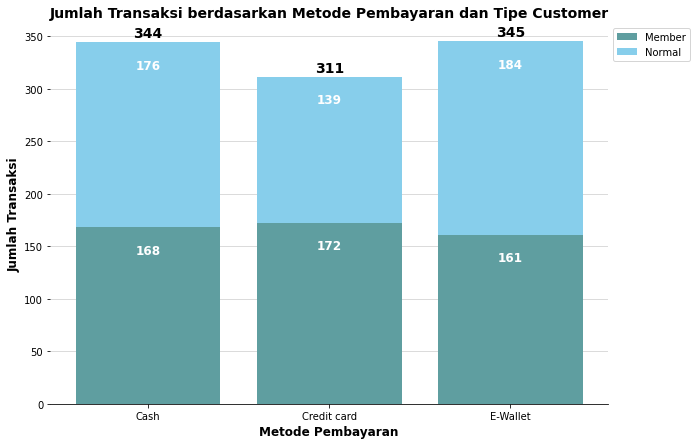

In [58]:
#StackCol1.index
fig, ax = plt.subplots(figsize=(10,7))
bar_color = ['cadetblue','skyblue']

# Add Data Label Per category (Based on Payment)
value = np.zeros(len(StackCol1))
for i, col in enumerate(StackCol1.columns):
    ax.bar(
    StackCol1.index, StackCol1[col], bottom=value, label=col, color=bar_color[i])
    value += np.array(StackCol1[col])

totalPayment = StackCol1.sum(axis=1)
y_offset1 = 5

for i, total in enumerate(totalPayment):
    ax.text(totalPayment.index[i], total + y_offset1, round(total), ha='center', weight='bold', size=14)

# Add Data Label for legend
y_offset2 = -25
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + bar.get_y() + y_offset2,
        round(bar.get_height()),
        ha = 'center',
        color= 'white',
        weight = 'bold',
        size = 12
    )

# Set border line
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='lightgrey', linestyle='-')
#ax.xaxis.grid(False)

ax.legend(loc='best', bbox_to_anchor=(1,1))
ax.set_xlabel('Metode Pembayaran', size=12, fontweight='bold')
ax.set_ylabel('Jumlah Transaksi', size=12, fontweight='bold')
ax.set_title('Jumlah Transaksi berdasarkan Metode Pembayaran dan Tipe Customer', size=14, fontweight='bold')

<b>Penjelasan mengenai <i>Stacked Column Chart</i></b>
<p>Grafik diatas menggambarkan jumlah metode pembayaran yang dilakukan oleh customer berdasarkan tipe customernya selama tahun 2019.
<br>Secara keseluruhan (customer biasa dan member) E-Wallet merupakan metode pembayaran yang paling banyak dilakukan oleh customer, 
<br>diikuti oleh pembayaran melalui uang tunai atau cash yang hanya berbeda satu poin. 
Pembayaran dengan kartu kredit adalah metode pembayaran paling sedikit dilakukan oleh customer.

Berikut pembacaan grafik yang lebih rinci:
- Pada metode pembayaran E-Wallet dominan dilakukan oleh customer biasa (tidak memakai kartu member dalam melakukan), yaitu berjumlah 184 transaksi. 
 <br>Sedangkan metode pembayaran ini paling sedikit dilakukan oleh member, yaitu hanya 161 transaksi.
- Begitu juga dengan pembayaran uang tunai yang paling banyak dilakukan oleh customer biasa sebanyak 176 transaksi,
dibandingkan dengan  member yang berjumlah 168 transaksi.
- Pembayaran dengan kartu kredit paling banyak dilakukan oleh member yaitu sebanyak 172 transaksi, dan paling sedikit dilakukan oleh customer biasa yaitu sebanyak 161 transaksi.

### 2. Menghitung persentase total dari cara pembayaran untuk customer biasa dengan pie chart

In [59]:
Normal_CustT = StackCol1['Normal'].to_frame()
Normal_CustT.reset_index(inplace=True)
Normal_CustT

,Payment,Normal
0,Cash,176
1,Credit card,139
2,E-Wallet,184


In [60]:
Normal_CustT.rename(columns={'Normal':'Total'}, inplace=True)
Normal_CustT

,Payment,Total
0,Cash,176
1,Credit card,139
2,E-Wallet,184


Text(0.5, 1.0, 'Persentase Metode Pembayaran pada Customer Biasa')

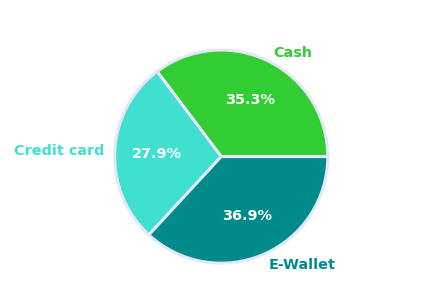

In [61]:
fig, ax = plt.subplots()
x = Normal_CustT['Total']
cat = Normal_CustT['Payment']
colors=['limegreen','turquoise','darkcyan']

patches, texts, pcts = ax.pie(x, labels=cat, autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor':'lavender'},
       textprops={'size': 'x-large'}, colors=colors)


for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
    plt.setp(pcts, color='white', weight='bold')
    plt.setp(texts, fontweight=600)
plt.tight_layout()
plt.title('Persentase Metode Pembayaran pada Customer Biasa', size=14, color='white', fontweight='bold')

<b>Penjelasan mengenai <i>Pie Chart</i></b>
- Grafik diatas merupakan <i>Pie Chart</i> yang menggambarkan metode pembayaran yang dilakukan oleh customer biasa (tidak memakai kartu member saat pembayaran).
- Customer biasa paling banyak melakukan pembayaran dengan E-Wallet dengan persentase 36,9% dari total customer biasa pada tahun 2019.
- Kemudian diikuti oleh pembayaran dengan uang tunai yang memiliki persentase sebesar 35,3%.
- Kurang dari sepertiga dari total customer biasa (< 33%) melakukan transaksi dengan kartu kredit dengan persentase 27,9%.

### 3. Menghitung jumlah `Product line` yang dibeli oleh customer berdasarkan jenis kelamin

Langkah pertama diawali dengan membuat tabel baru untuk menghasilkan total customer berdasarkan produk yang dibeli dan jenis kelamin.

In [62]:
ProGen = data_set['Gender'].groupby(data_set['Product line']).value_counts().to_frame()
ProGen

Gender
Product line           Gender        
Electronic accessories Male        86
                       Female      84
Fashion accessories    Female      96
                       Male        82
Food and beverages     Female      90
                       Male        84
Health and beauty      Male        88
                       Female      64
Home and lifestyle     Male        81
                       Female      79
Sports and travel      Female      88
                       Male        78

Dilanjutkan <i>mereset</i> indeks pada data yang baru dibuat

In [63]:
ProGen.columns = ['Total']
ProGen.reset_index(inplace=True)
ProGen

,Product line,Gender,Total
0,Electronic accessories,Male,86
1,Electronic accessories,Female,84
2,Fashion accessories,Female,96
3,Fashion accessories,Male,82
4,Food and beverages,Female,90
5,Food and beverages,Male,84
6,Health and beauty,Male,88
7,Health and beauty,Female,64
8,Home and lifestyle,Male,81
9,Home and lifestyle,Female,79


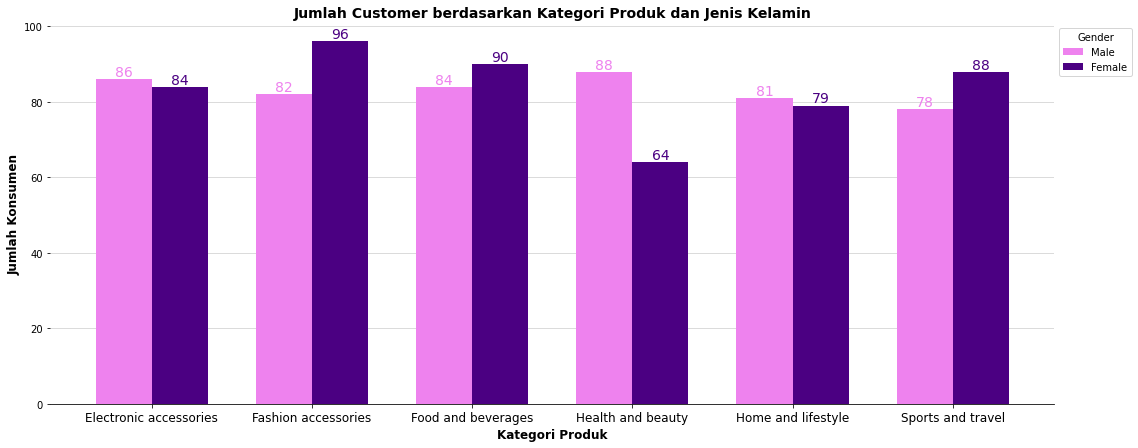

In [64]:
fig, ax = plt.subplots(figsize=(18,7))
x = np.arange(len(ProGen['Product line'].unique()))

bar_width = 0.35

male_bar = ax.bar(x, ProGen.loc[ProGen['Gender'] == 'Male', 'Total'], 
                    width = bar_width, color='violet')
female_bar = ax.bar(x + bar_width, ProGen.loc[ProGen['Gender']== 'Female', 'Total'],
                     width=bar_width, color='indigo')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(ProGen['Product line'].unique(), size=12)

ax.legend(ProGen['Gender'], title='Gender', loc='best', bbox_to_anchor=(1,1))

# Set border line
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='lightgrey', linestyle='-')
#ax.xaxis.grid(False)
ax.set_title('Jumlah Customer berdasarkan Kategori Produk dan Jenis Kelamin', size= 14, fontweight='bold')
ax.set_xlabel('Kategori Produk', size=12, fontweight='bold')
ax.set_ylabel('Jumlah Konsumen', size=12, fontweight='bold')

for bar in ax.patches:
    bar_value = bar.get_height()
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, size=14)

<b>Penjelasan Mengenai <i>Categorical Column Chart</i></b>
<br>Pada grafik diatas menggambarkan jumlah barang yang terjual berdasarkan kategori produk yang dibeli oleh customer laki-laki dan customer perempuan selama tahun 2019. Secara keseluruhan jumlah customer perempuan dengan jumlah customer laki-laki sebanding atau hampir sebanding. Hal ini dikarenakan masing-masing gender mempunyai 3 kategori produk yang dominan. Bisa dikatakan jumlah  kategori produk yang didominasi oleh customer laki-laki sama dengan jumlah kategori produk yang didominasi oleh customer perempuan.

<br>Kategori produk yang dominan dibeli oleh customer laki-laki diantaranya:
- Electronic accessories
- Health and Beauty
- Home and lifestyle

<br>Sedangkan kategori produk yang dominan dibeli oleh customer perempuan :
- Fashion accessories
- Food and beverages
- Sport and travel

<br>Kategori produk yang paling banyak dibeli oleh customer perempuan adalah <i>Fashion accessories</i>, yaitu sebanyak 96 produk.
<br>Sedangkan jumlah kategori produk yang paling sedikit dibeli oleh customer perempuan adalah <i>Health and beauty</i>, yaitu sebanyak 64 produk.
<br>Untuk customer laki-laki paling banyak membeli kategori produk <i>Health and beauty</i>, sebanyak 88 produk.
<br>Kategori produk yang paling sedikit dibeli oleh customer laki-laki adalah <i>Sport and travel</i>, sebanyak 78 produk.

### 4. Menentukan jumlah `Total Sales` berdasarkan bulan transaksi selama 2019 dengan Line Chart

Menambah kolom baru berisi nama bulan yang diambil dari kolom `Month Name`

In [65]:
import calendar
data_set['Month Name'] = data_set['ModifiedDate'].dt.strftime('%B')
data_set.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,ModifiedDate,Payment,Rating,Total Sales,Month Name
0,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,2019-01-01,Credit card,6.9,435.66,January
1,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,2019-01-01,Cash,5.7,380.72,January
2,891-01-7034,B,Mandalay,Normal,Female,Electronic accessories,74.71,6,2019-01-01,Cash,6.7,448.26,January
3,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,2019-01-01,Credit card,7.0,369.80,January
4,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,2019-01-01,Cash,8.5,126.44,January


Menghitung jumlah total sales berdasarkan bulan

In [66]:
SumByMonth = data_set['Total Sales'].groupby(data_set['Month Name'], sort=False).sum()
SumByMonth = round(SumByMonth, 2).to_frame()
SumByMonth.columns = ['Total']
SumByMonth.reset_index(inplace=True)
SumByMonth

,Month Name,Total
0,January,82440.54
1,February,60161.66
2,March,69285.00
3,April,7578.69
4,May,12189.23
5,June,9154.50
6,July,10953.06
7,August,12860.74
8,September,13111.70
9,October,9395.43


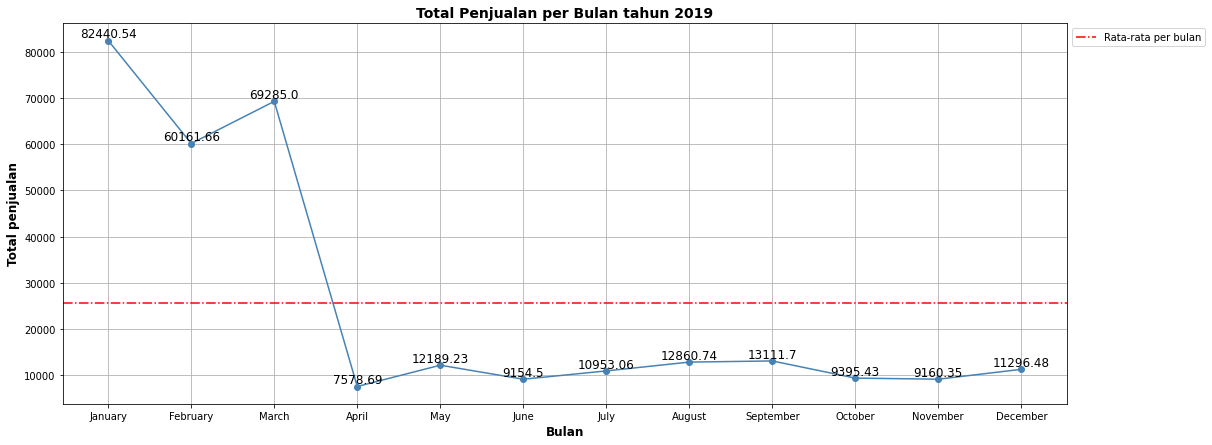

In [67]:
sbm_x = SumByMonth['Month Name']
sbm_y = SumByMonth['Total']

plt.subplots(figsize=(18,7))
plt.plot(sbm_x, sbm_y, color='steelblue', marker='o')
plt.grid(True)

for i,j in sbm_y.items():
    plt.annotate(str(j), xy=(i, j), size=12, label='Mean per Month', ha='center', va='bottom')

plt.axhline(y = sbm_y.mean(), color = 'red', linestyle = '-.', label='Rata-rata per bulan') 

plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title('Total Penjualan per Bulan tahun 2019', size=14, fontweight='bold')
plt.xlabel('Bulan', size=12, fontweight='bold')
plt.ylabel('Total penjualan', size=12, fontweight='bold')
#plt.set_xticklabels(data_set['Month Name'].unique(), size=12)
plt.show()

<b>Penjelasan Mengenai <i>Line Chart</i></b>
<br><i>Line chart</i> diatas menggambarkan total penjualan dari bulan Januari hingga Desember tahun 2019.
<p>Secara garis besar total penjualan pada Triwulan pertama (Januari-Maret) sangat tinggi, bahkan diatas rata-rata penjualan per bulan. 
<br>Mulai April hingga akhir tahun, nilai total penjualan dibawah rata-rata penjualan per bulan. 
<br>Pergerakan total penjualan (April hingga Desember) cenderung stabil/relatif landai, tidak terdapat peningkatan atau penurunan secara signifikan.

<br> Berikut pembacaan grafik yang lebih rinci:
- Total penjualan paling tinggi terjadi pada bulan Januari, yakni sebesar 82.440,54 dolar.
- Sedangkan total penjualan paling rendah terjadi di bulan April, yakni sebesar 7.578,69 dolar.
- Pada bulan Maret hingga April terjadi penurunan penjualan secara signifikan, bahkan nilai dari total penjualan di bulan April kurang dari 20% dari total penjualan pada bulan Maret.
- Pada Bulan Juni hingga September, terjadi peningkatan penjualan meskipun tidak terlalu terlihat pada grafik.
<br>Total penjualan pada bulan Juni sebesar 9.154,5 dolar menjadi 13.111,7 dolar di bulan September.

### 5. Menentukan total penjualan di semester dua (Juli hingga Desember) tahun 2019

Karena pergerakan total penjualan di semester dua relatif stabil, maka dilakukan analisa lebih lanjut untuk penjualan dari bulan Juli hingga Desember

In [68]:
SumByMonth_sms2 = SumByMonth[6:]
#df.index = np.arange(1, len(df) + 1)
SumByMonth_sms2.index = np.arange(0 , len(SumByMonth_sms2))
SumByMonth_sms2

,Month Name,Total
0,July,10953.06
1,August,12860.74
2,September,13111.70
3,October,9395.43
4,November,9160.35
5,December,11296.48


In [69]:
sms2_x = SumByMonth_sms2['Month Name']
sms2_y = SumByMonth_sms2['Total']

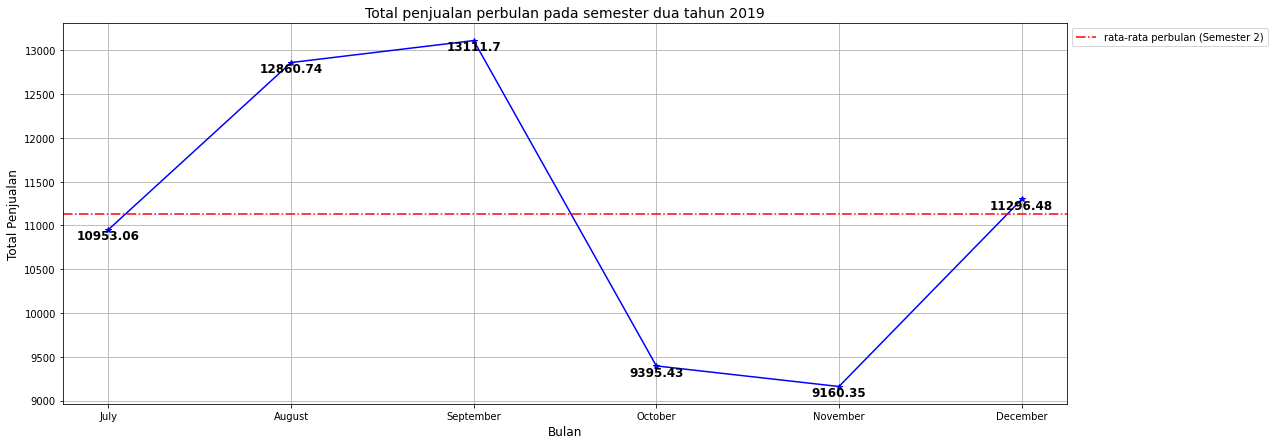

In [70]:
sms2_x = SumByMonth_sms2['Month Name']
sms2_y = SumByMonth_sms2['Total']

plt.subplots(figsize=(18,7))
plt.plot(sms2_x, sms2_y, color='blue', marker='*')
#plt.s(8000, 15000)
plt.grid(True)

for a,b in sms2_y.items():
    plt.annotate(str(b), xy=(a,b), size=12, ha='center', va='top', fontweight='bold')

plt.axhline(y = sms2_y.mean(), color = 'red', linestyle = '-.', label='rata-rata perbulan (Semester 2)') 

plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title('Total penjualan perbulan pada semester dua tahun 2019', size=14) 
plt.ylabel('Total Penjualan', size=12)
plt.xlabel('Bulan', size=12)   
#plt.set_xticklabels(data_set['Month Name'].unique(), size=12)
plt.show()

<b>Penjelasan Line Chart</b>
<br><i>Line Chart</i> diatas sama dengan <i>Line Chart</i> yang telah dijelaskan sebelumnya, yaitu membahas total penjualan berdasarkan bulan di tahun 2019.
<br>Tetapi yang membedakan adalah <i>Line Chart</i> disini hanya mengambil data di semester dua (Juli hingga Desember), serta perhitungan rata-rata penjualan juga dihitung mulai bulan Juli. Selama semester dua, penjualan mengalami kenaikan dan penurunan.

<br>Penjelasan Grafik lebih rinci :
- Total penjualan di bulan Juli sebesar 10.953,06 dolar dan dibawah rata-rata penjualan semester dua.
- Kemudian dari bulan Juli hingga September, penjualan mengalami kenaikan sehingga mencapai total penjualan terbanyak di semester dua sebesar 13.111,7 dolar.
- Total penjualan mulai menurun drastis dari bulan September yang bernilai 13.111,7 dolar menjadi 9.395,43 dolar (sudah berada di area bawah rata-rata penjualan) pada bulan Oktober. 
- Penurunan penjualan terjadi lagi dari bulan Oktober hingga November hingga ke titik terendah menjadi 9.160,35 dolar, meskipun hanya berkurang beberapa angka (tidak terlalu banyak atau signifikan).
- Total kenaikan penjualan terjadi lagi diantara bulan November ke bulan Desember.
<br>Kenaikan pada bulan tersebut cukup tajam, sehingga total penjualan di bulan Desember berada di area atas rata-rata penjualan. Total penjualan di bulan Desember sebesar 11.296,48 dolar.

### 6. Total penjualan di beberapa Kota pada Semester dua tahun 2019

In [71]:
# Mengambil seluruh data yang melakukan transaksi dibulan Juli hingga Desember
sms2 = data_set[data_set['Month Name'].isin(['July', 'August', 'September', 'October', 'November', 'December'])]
sms2['Month Name'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [72]:
# mengecek isi data secara keseluruhan 
sms2.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,ModifiedDate,Payment,Rating,Total Sales,Month Name
207,232-16-2483,C,Naypyitaw,Member,Female,Sports and travel,68.12,1,2019-07-01,E-Wallet,6.8,68.12,July
208,109-28-2512,B,Mandalay,Member,Female,Fashion accessories,97.61,6,2019-07-01,E-Wallet,9.9,585.66,July
209,799-71-1548,A,Yangon,Member,Male,Electronic accessories,77.72,4,2019-07-01,Credit card,8.8,310.88,July
210,126-54-1082,A,Yangon,Member,Female,Home and lifestyle,21.54,9,2019-07-01,Credit card,8.8,193.86,July
211,566-19-5475,B,Mandalay,Normal,Male,Fashion accessories,47.97,7,2019-07-01,Cash,6.2,335.79,July


In [73]:
# Menghitung total penjualan berdasarkan bulan di beberapa kota
sms2Sales = sms2.groupby(['Month Name','City'], sort=False)['Total Sales'].sum().to_frame()
sms2Sales.reset_index(inplace=True)
sms2Sales

,Month Name,City,Total Sales
0,July,Naypyitaw,3425.08
1,July,Mandalay,4155.36
2,July,Yangon,3372.62
3,August,Naypyitaw,5215.94
4,August,Mandalay,3863.77
5,August,Yangon,3781.03
6,September,Naypyitaw,5682.43
7,September,Mandalay,4019.17
8,September,Yangon,3410.10
9,October,Yangon,3079.39


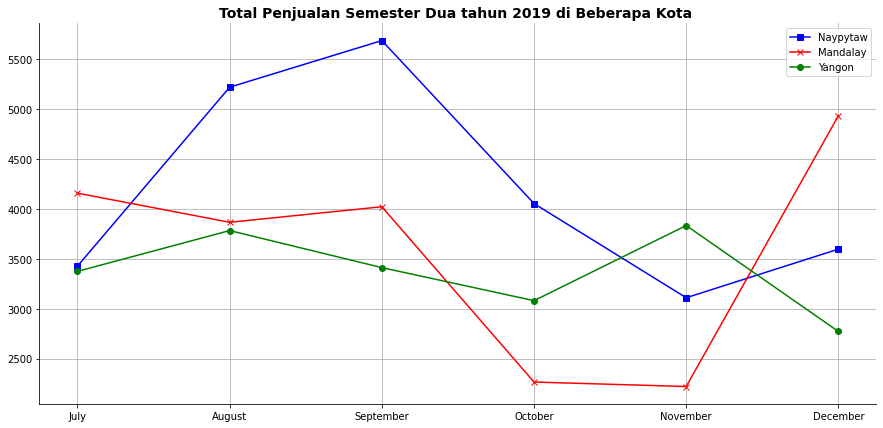

In [74]:
# nilai untuk x-axis
yangon = sms2Sales['Total Sales'].loc[sms2Sales['City']== 'Yangon']
naypyitaw = sms2Sales['Total Sales'].loc[sms2Sales['City']== 'Naypyitaw']
mandalay = sms2Sales['Total Sales'].loc[sms2Sales['City']== 'Mandalay']

# nilai untuk y-axis
month = sms2Sales['Month Name'].unique()

fig, ax = plt.subplots(figsize=(15,7))
    
ax.plot(month, naypyitaw, marker='s', label= 'Naypytaw', color='blue')
ax.plot(month, mandalay, marker='x', label= 'Mandalay', color='red')
ax.plot( month, yangon, marker='o', label= 'Yangon', color='green')
#plt.set_xtickslabel(month)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.tick_params(bottom=False, left=False)
ax.grid(True)
ax.set_title('Total Penjualan Semester Dua tahun 2019 di Beberapa Kota ', fontweight='bold', size=14)
ax.legend()


<b>Penjelasan <i>Line Chart</i></b>
<br><i>Line Chart</i> diatas menggambarkan total penjualan di kota Naypitaw, Mandalay, Yangon dari bulan Juli sampai Desember (semester dua) tahun 2019.
<br>Secara garis besar penjualan di Naypitaw dan Mandalay mengalami kenaikan dan penurunan yang signifikan, berbeda dengan penjualan di Yangon yang memiliki nilai yang relatif stabil jika dibandingkan dengan penjualan di Naypitaw dan Mandalay. Pada awal semester dua, total penjualan paling banyak di Mandalay, dengan nilai mencapai lebih dari 4.000 dolar. Sedangkan total penjualan di Naypitaw sedikit lebih banyak dibandingkan total penjualan di Yangon.

Berikut penjelasan lebih rinci mengenai grafik penjualan per kota:
<br>Penjualan Semester dua Naypitaw 
- Total penjualan di Naypitaw mengalami kenaikan hingga ke titik puncak (nilai total penjualan terbesar dibanding Yangon dan Mandalay) di bulan September, dengan total penjualan melebihi 5.500 dolar.
- Setelah bulan September hingga November, total pejualan di Naypitaw mengalami penurunan secara signifikan. <br>Penurunan tersebut membuat total penjualan mencapai titik terendah bagi kota Naypitaw, dengan total penjualan kurang dari 3.500 dolar bahkan hampir menyentuh angka 3.000 dolar.
- Kemudian dari bulan November hingga Desember mengalami kenaikan penjualan hingga diatas 3.500 dolar.

<br>Penjualan Semester Dua di Mandalay :
- Bulan Juli sampai bulan Agustus total penjualan mengalami penurunan, dengan total penjualan dibawah 4.000 dolar.
- Kemudian bulan Agustus menuju bulan September mengalami sedikit kenaikan, dengan total penjualan sekitar 4.000 dolar.
- Mulai bulan September sampai bulan Oktober penjualan mengalami penurunan yang sangat tajam (total penjualan sampai dibawah 2.500 dolar), melampaui penurunan total penjualan di Yangon dalam rentang waktu yang sama. Dan memiliki total penjualan paling rendah dibandingkan Yangon dan Mandalay.
- Terjadi sedikit penurunan lagi pada bulan Oktober menuju bulan November, hingga mencapai titik terendah untuk total penjualan di kota Mandalay.
- Mulai bulan November hingga bulan Desember penjualan di Mandalay meningkat tajam atau naik hingga lebih dari dua kali lipat. Peningkatan penjualan di Mandalay melampaui peningkatan penjualan di Naypitaw dalam rentang waktu yang sama. Sehingga di bulan Desember, total penjualan di Mandalay paling banyak dibandingkan dua kota lainnya.

<br> Penjualan Semester Dua di Yangon :
- Pada bulan Juli hingga Agustus penjualan mengalami kenaikan, total penjualan di bulan Agustus diatas 3.500 dolar.
- Kemudian mulai Agustus hingga Oktober mengalami penurunan penjualan, hingga hampir mendekati 3.000 dolar.
- Pada bulan Oktober ke November mengalami kenaikan penjualan. Dalam rentang waktu yang sama penjualan di Naypitaw mengalami penurunan penjualan, sehingga total penjualan di Yangon lebih besar dari Naypitaw.
- Bulan November hingga Desember penjualan di Yangoon kembali mengalami penurunan, disaat yang sama penjualan di Naypitaw dan Mandalay mengalami peningkatan. Oleh karena itu, di akhir tahun total penjualan di Naypitaw paling kecil.

## D. Kesimpulan

- Supermaket Sales adalah data yang menyajikan transaksi yang dilakukan di suatu perusahaan supermarket selama tahun 2019.
- Secara garis besar data yang tersimpan pada Supermarket Sales berupa id faktur penjualan(<i>Invoice ID</i>), tipe dan jenis kelamin konsumen, metode pembayaran, kategori produk, kuantitas dan harga suatu produk yang dibeli, tempat dan tanggal transaksi.
- Metode pembayaran paling banyak dilakukan dengan menggunakan E-Wallet yang didominasi oleh customer biasa.
- Pembayaran dengan kartu kredit merupakan metode yang paling sedikit dilakukan dan yang didominasi oleh member.
- Kategori produk yang paling laku terjual yaitu Fashion accessories yang banyak dibeli oleh customer perempuan.
- Selama tahun 2019, total penjualan paling paling banyak di bulan Januari. Sedangkan total penjualan paling sedikit terjadi di bulan April.
- Total penjualan di bulan April hingga Desember dibawah rata-rata penjualan perbulan selama satu tahun.
- Selama penjualan semester dua, total penjualan paling tinggi di bulan September. Dan pada bulan September nilai penjualan paling tinggi berada di Naypitaw.